Import libraries for use in data analysis

In [383]:
#import pandas library as 'pd'
import pandas as pd
#import pyplot module from matplotlib library as 'plt'
import matplotlib.pyplot as plt
#jupyter magic command to display matplotlib graph plots inline rtaher than in a separate window
%matplotlib inline



Import stock data for **AAPL**

In [384]:
#read csv file into a pandas dataframe
aapl = pd.read_csv('./data/AAPL.csv')
#display the first 5 rows of the dataframe to check loaded
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,153.160004,154.240005,151.919998,153.339996,152.435699,97943200
1,2022-11-01,155.080002,155.449997,149.130005,150.649994,149.761551,80379300
2,2022-11-02,148.949997,152.169998,145.000000,145.029999,144.174698,93604600
3,2022-11-03,142.059998,142.800003,138.750000,138.880005,138.060959,97918500
4,2022-11-04,142.089996,142.669998,134.380005,138.380005,137.792114,140814800


In [385]:
#display the last 5 rows of the dataframe to check loaded
aapl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2023-10-25,171.880005,173.059998,170.649994,171.100006,171.100006,57157000
248,2023-10-26,170.369995,171.380005,165.669998,166.889999,166.889999,70625300
249,2023-10-27,166.910004,168.960007,166.830002,168.220001,168.220001,58468600
250,2023-10-30,169.020004,171.169998,168.869995,170.289993,170.289993,51082900
251,2023-10-31,169.350006,170.750000,167.899994,170.364502,170.364502,28201324


Create new MA columns - 20 and 60 day MA

In [386]:
#create new MA20 column in the dataframe and calculate the 20 day moving average
aapl['MA20'] = aapl['Close'].rolling(20).mean()
#create new MA60 column in the dataframe and calculate the 60 day moving average
aapl['MA60'] = aapl['Close'].rolling(60).mean()
#use dropna() to remove any rows with missing data
aapl = aapl.dropna()
#display the first 5 rows of the dataframe to check
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA60
59,2023-01-26,143.169998,144.250000,141.899994,143.960007,143.348419,54105100,133.397000,139.896999
60,2023-01-27,143.160004,147.229996,143.080002,145.929993,145.310028,70555800,134.391500,139.773499
61,2023-01-30,144.960007,145.550003,142.850006,143.000000,142.392502,64015300,135.060999,139.645999
62,2023-01-31,142.699997,144.339996,142.279999,144.289993,143.677002,65874500,135.778999,139.633666
63,2023-02-01,143.970001,146.610001,141.320007,145.429993,144.812149,77663600,136.796999,139.742832


Based on a simple signal whereby if MA20 crosses above the MA60 we buy the stock and hold for one day:
- Create a new column called "shares" where by if MA20 > MA60, denote 1 (signal to buy stock), otherwise denote 0 (do nothing)

In [387]:
#create new "shares" column
aapl['Shares'] = [1 if aapl.loc[ei, 'MA20']>aapl.loc[ei, 'MA60'] else 0 for ei in aapl.index]

#display the first 20 rows of the dataframe to check
aapl.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA60,Shares
59,2023-01-26,143.169998,144.250000,141.899994,143.960007,143.348419,54105100,133.397000,139.896999,0
60,2023-01-27,143.160004,147.229996,143.080002,145.929993,145.310028,70555800,134.391500,139.773499,0
61,2023-01-30,144.960007,145.550003,142.850006,143.000000,142.392502,64015300,135.060999,139.645999,0
62,2023-01-31,142.699997,144.339996,142.279999,144.289993,143.677002,65874500,135.778999,139.633666,0
63,2023-02-01,143.970001,146.610001,141.320007,145.429993,144.812149,77663600,136.796999,139.742832,0
64,2023-02-02,148.899994,151.179993,148.169998,150.820007,150.179276,118339000,138.019999,139.950166,0
65,2023-02-03,148.029999,157.380005,147.830002,154.500000,153.843628,154357300,139.494000,140.209832,0
66,2023-02-06,152.570007,153.100006,150.779999,151.729996,151.085403,69858300,140.599500,140.413666,1
67,2023-02-07,150.639999,155.229996,150.639999,154.649994,153.992996,83322600,141.824500,140.743332,1
68,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.274597,64120100,142.884000,140.827499,1


Now to backtest the strategy to see if it would have been profitable over the timeframe of the dataset (YTD 2023)
To do this:
- create a new column ("Close1") which shifts the close price back by 1 day so that you can calculate a PnL on a 1 day TF (current days close price - yesterdays close price)
- create a new column ("Profit") which calculates "Close1" - "Close" (our PnL) only IF the shares column for that day = 1 (we have actually bought stock)

<Figure size 2000x1000 with 0 Axes>

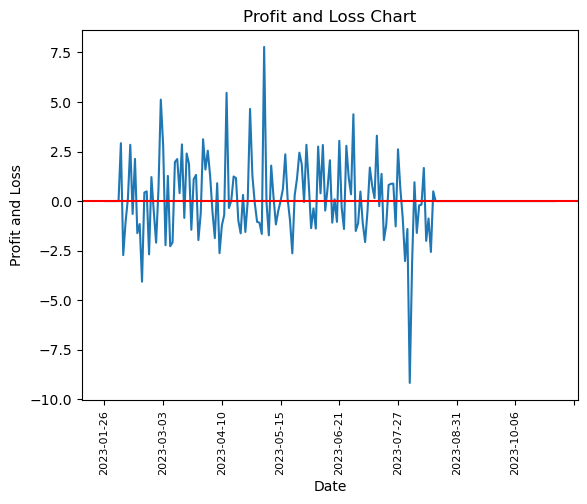

<Figure size 2000x1000 with 0 Axes>

In [388]:
#create new "Close1" column
aapl['Close1'] = aapl['Close'].shift(-1)

#create new "Profit" column
aapl['Profit'] = [aapl.loc[ei, 'Close1'] - aapl.loc[ei, 'Close'] if aapl.loc[ei, 'Shares']==1 else 0 for ei in aapl.index]

#plot a graph to show PnL
#set the index of the dataframe to the Date column
aapl.set_index('Date', inplace=True)
#plot the index as the x axis
aapl['Profit'].plot(x=aapl.index)
#customise graph output
plt.axhline(y=0, color='red')
plt.title('Profit and Loss Chart')
plt.xlabel('Date')
plt.ylabel('Profit and Loss')
plt.xticks(rotation=90, fontsize=8) 
plt.figure(figsize=(20,10))




From the graph above we can see the results are quite up and down but with a significant down day in early august.

To calculate the return of the model over the period of the strategy need to calculate the cumulative sum of the Profit Column

In [389]:
#create new "wealth" column
aapl['wealth'] = aapl['Profit'].cumsum()

#see results 
aapl.head(60)



,Open,High,Low,Close,Adj Close,Volume,MA20,MA60,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.348419,54105100,133.397000,139.896999,0,145.929993,0.000000,0.000000
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.310028,70555800,134.391500,139.773499,0,143.000000,0.000000,0.000000
2023-01-30,144.960007,145.550003,142.850006,143.000000,142.392502,64015300,135.060999,139.645999,0,144.289993,0.000000,0.000000
2023-01-31,142.699997,144.339996,142.279999,144.289993,143.677002,65874500,135.778999,139.633666,0,145.429993,0.000000,0.000000
2023-02-01,143.970001,146.610001,141.320007,145.429993,144.812149,77663600,136.796999,139.742832,0,150.820007,0.000000,0.000000
2023-02-02,148.899994,151.179993,148.169998,150.820007,150.179276,118339000,138.019999,139.950166,0,154.500000,0.000000,0.000000
2023-02-03,148.029999,157.380005,147.830002,154.500000,153.843628,154357300,139.494000,140.209832,0,151.729996,0.000000,0.000000
2023-02-06,152.570007,153.100006,150.779999,151.729996,151.085403,69858300,140.599500,140.413666,1,154.649994,2.919998,2.919998
2023-02-07,150.639999,155.229996,150.639999,154.649994,153.992996,83322600,141.824500,140.743332,1,151.919998,-2.729996,0.190002


<Figure size 2000x1000 with 0 Axes>

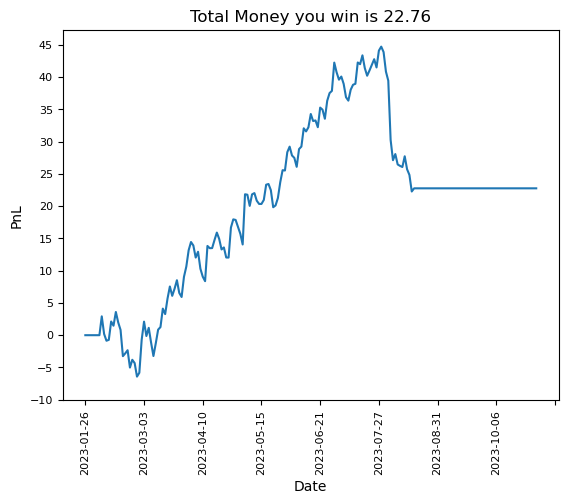

<Figure size 2000x1000 with 0 Axes>

In [390]:
#plot a graph to show wealth
aapl['wealth'].plot()
#customise graph output
# Define Y-axis tick locations (in multiples of 5)
max_wealth = int(aapl['wealth'].max())
min_wealth = 5* round(int(aapl['wealth'].min())/5)
y_ticks = range(min_wealth - 5, max_wealth + 5, 5)
#contents of format() method will be displayed in the {} placeholder
#display 2nd to last row of dataframe to account for NaN value in last row
#format output of title to 2 decimal places using {:.2f} string formatting
plt.title('Total Money you win is {:.2f}'.format(aapl.loc[aapl.index[-2], 'wealth']))
plt.ylabel('PnL')
plt.xlabel('Date')
plt.xticks(rotation=90, fontsize=8) 
# Set Y-axis ticks and labels
plt.yticks(y_ticks, fontsize=8)
plt.figure(figsize=(20,10))





